In [4]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
#as rename 
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [5]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/Be-Cenzo/SpaceAI/main/Dataset/"
FILE_PATH = os.path.join("Dataset")
FILE_URL1 = DOWNLOAD_ROOT + "star_classification.csv"

#download del dataset
def fetch_file_data1(file_url1=FILE_URL1, file_path1=FILE_PATH):
    os.makedirs(file_path1, exist_ok=True)
    csv_path1 = os.path.join(file_path1, "star_classification.csv")
    urllib.request.urlretrieve(file_url1, csv_path1)

fetch_file_data1()

In [6]:
#lettura del dataset
datapath = os.path.join("Dataset", "")

stars = pd.read_csv(datapath + "star_classification.csv")

In [7]:
#distribuzione dei dati
print(stars.describe())

             obj_ID          alpha          delta              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237665e+18     177.629117      24.135305      21.980468   
std    8.438560e+12      96.502241      19.644665      31.769291   
min    1.237646e+18       0.005528     -18.785328   -9999.000000   
25%    1.237659e+18     127.518222       5.146771      20.352353   
50%    1.237663e+18     180.900700      23.645922      22.179135   
75%    1.237668e+18     233.895005      39.901550      23.687440   
max    1.237681e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230      18.135828      1

In [8]:
#ricerca di dati mancanti
print(stars.head(20))
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print(stars.isnull().sum())

missing_values = ["n/a", "na", "--", "nan", "NaN", -9999]
stars = pd.read_csv(datapath + "star_classification.csv", na_values = missing_values)
print(missing_values)

#data quality imputation
#drop column with null value
#heart = heart.dropna(axis=1)
#droo row with null value
#heart = heart.dropna(axis=0)
#heart['name']=heart['name'].fillna(heart['name'].mean())

          obj_ID       alpha      delta         u         g         r  \
0   1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1   1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2   1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3   1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4   1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
5   1.237680e+18  340.995121  20.589476  23.48827  23.33776  21.32195   
6   1.237679e+18   23.234926  11.418188  21.46973  21.17624  20.92829   
7   1.237679e+18    5.433176  12.065186  22.24979  22.02172  20.34126   
8   1.237661e+18  200.290475  47.199402  24.40286  22.35669  20.61032   
9   1.237671e+18   39.149691  28.102842  21.74669  20.03493  19.17553   
10  1.237680e+18  328.092076  18.220310  25.77163  22.52042  20.63884   
11  1.237662e+18  243.986637  25.738280  23.76761  23.79969  20.98318   
12  1.237681e+18  345.801874  32.672868  23.17274  

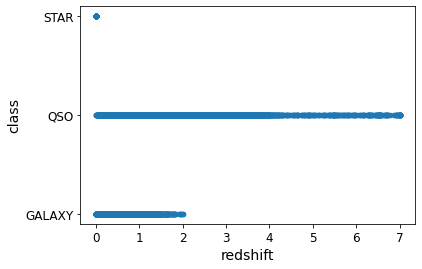

In [9]:
#scatterplot -> definition

stars.plot(x='redshift', y='class',kind='scatter')
plt.show()

In [10]:
#definizione delle variabili indipendenti e della variabile target
dataset=pd.read_csv(datapath + "star_classification.csv")

X = dataset.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11, 12, 14, 15, 16, 17]]
y= dataset.iloc[ : , 13]

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

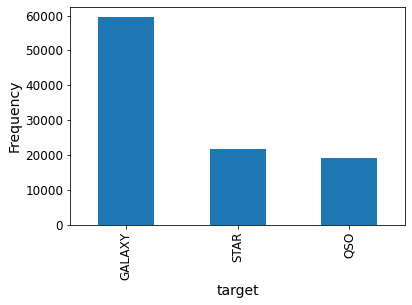

In [11]:
#plot della distribuzione della variabile target
pd.value_counts(dataset['class']).plot.bar()
plt.xlabel('target')
plt.ylabel('Frequency')
dataset['class'].value_counts()

In [122]:
from sklearn.model_selection import train_test_split

#divisione del dataset in training set e testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (80000, 17)
Number transactions y_train dataset:  (80000,)
Number transactions X_test dataset:  (20000, 17)
Number transactions y_test dataset:  (20000,)


In [ ]:
#Oversampling utilizzando SMOTE
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label 'GALAXY': {}".format(sum(y_train == "GALAXY")))
print("Before OverSampling, counts of label 'QSO': {}".format(sum(y_train == "QSO")))
print("Before OverSampling, counts of label 'STAR': {} \n".format(sum(y_train == "STAR")))

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [123]:
#Undersampling utilizzando RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

print("Before UnderSampling, counts of label 'GALAXY': {}".format(sum(y_train == "GALAXY")))
print("Before UnderSampling, counts of label 'QSO': {}".format(sum(y_train == "QSO")))
print("Before UnderSampling, counts of label 'STAR': {} \n".format(sum(y_train == "STAR")))

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

Before UnderSampling, counts of label 'GALAXY': 47585
Before UnderSampling, counts of label 'QSO': 15164
Before UnderSampling, counts of label 'STAR': 17251 



In [ ]:
#Undersampling utilizzando ClusterCentroids
from imblearn.under_sampling import ClusterCentroids

print("Before UnderSampling, counts of label 'GALAXY': {}".format(sum(y_train == "GALAXY")))
print("Before UnderSampling, counts of label 'QSO': {}".format(sum(y_train == "QSO")))
print("Before UnderSampling, counts of label 'STAR': {} \n".format(sum(y_train == "STAR")))

cc = ClusterCentroids(random_state=42)
X_train_res, y_train_res = cc.fit_resample(X_train, y_train)

In [99]:
#Undersampling utilizzando NearMiss
from imblearn.under_sampling import NearMiss

print("Before UnderSampling, counts of label 'GALAXY': {}".format(sum(y_train == "GALAXY")))
print("Before UnderSampling, counts of label 'QSO': {}".format(sum(y_train == "QSO")))
print("Before UnderSampling, counts of label 'STAR': {} \n".format(sum(y_train == "STAR")))

nm = NearMiss()
X_train_res, y_train_res = nm.fit_resample(X_train, y_train)

Before UnderSampling, counts of label 'GALAXY': 47585
Before UnderSampling, counts of label 'QSO': 15164
Before UnderSampling, counts of label 'STAR': 17251 



In [124]:
print("After Balancing, counts of label 'GALAXY': {}".format(sum(y_train_res == "GALAXY")))
print("After Balancing, counts of label 'QSO': {}".format(sum(y_train_res ==  "QSO")))
print("After Balancing, counts of label 'STAR': {}".format(sum(y_train_res ==  "STAR")))

After Balancing, counts of label 'GALAXY': 15164
After Balancing, counts of label 'QSO': 15164
After Balancing, counts of label 'STAR': 15164


GALAXY    15164
QSO       15164
STAR      15164
Name: class, dtype: int64

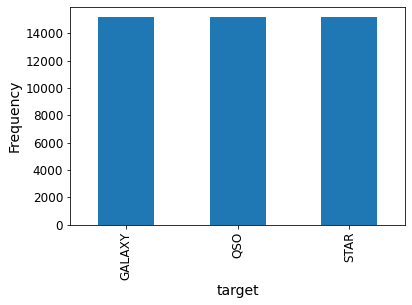

In [130]:
#plot della distribuzione della variabile target dopo il bilanciamento
pd.value_counts(y_train_res).plot.bar()
plt.xlabel('target')
plt.ylabel('Frequency')
y_train_res.value_counts()

In [125]:
#Normalizzazione dei dati
from sklearn.preprocessing import MinMaxScaler

scl = MinMaxScaler(feature_range=(0, 7)) #you can use differnt range
X_train_res = scl.fit_transform(X_train_res)
x_test = scl.fit_transform(X_test)

print(X_train_res)

[[6.59722529 6.84597186 2.97073663 ... 4.21960752 5.46791371 6.55855856]
 [3.31768171 4.7718035  3.21916693 ... 0.65035421 1.22146368 0.67967968]
 [3.61039248 0.70073319 1.21992027 ... 0.07979806 0.25614418 0.86186186]
 ...
 [3.61082746 0.78139927 1.32647911 ... 0.25079391 0.56485527 3.82582583]
 [6.77780621 0.26887409 1.04051546 ... 5.17148441 5.81485527 4.28128128]
 [6.94838877 0.04728657 3.1615013  ... 3.76817849 4.71764063 6.69169169]]


In [ ]:
#feature selection usando SelectKBest

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from numpy import set_printoptions

fs = SelectKBest(score_func=chi2,k=7)
fs.fit_transform(X_train_res, y_train_res)
#print(fs[:5])

X_new_train_res = fs.transform(X_train_res)
X_new_test = fs.transform(X_test)
print(X_new_train_res.shape)


X.columns[fs.get_support(indices=True)]

X.columns[fs.get_support(indices=True)].tolist()

In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

tree_model = DecisionTreeClassifier(max_depth=2, random_state=42)
#The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

tree_model.fit(X_train_res, y_train_res)

y_pred = tree_model.predict(X_test)

labels = np.unique(y_test)
print(confusion_matrix(y_test, y_pred, labels=labels))
print(classification_report(y_test, y_pred))

#Overall, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[11259   478   123]
 [  620  3176     1]
 [    0     0  4343]]
              precision    recall  f1-score   support

      GALAXY       0.95      0.95      0.95     11860
         QSO       0.87      0.84      0.85      3797
        STAR       0.97      1.00      0.99      4343

    accuracy                           0.94     20000
   macro avg       0.93      0.93      0.93     20000
weighted avg       0.94      0.94      0.94     20000

Accuracy: 0.9389


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


nb = MultinomialNB()
nb.fit(X_train_res, y_train_res)

y_pred = nb.predict(X_test)

labels = np.unique(y_test)
print(confusion_matrix(y_test, y_pred, labels=labels))
print(classification_report(y_test, y_pred))

#Overall, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [67]:
from sklearn.metrics import confusion_matrix

#stampa della matrice di confusione
labels = np.unique(y_test)
a =  confusion_matrix(y_test, y_pred, labels=labels)

pd.DataFrame(a, index=labels, columns=labels)

,GALAXY,QSO,STAR
GALAXY,11698,143,19
QSO,298,3498,1
STAR,5,0,4338
